In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/ML Practise/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ML Practise/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe().style.background_gradient(cmap = 'Blues')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.shape

(891, 12)

In [12]:
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [30]:
train.isnull().sum().sort_values(ascending=False)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

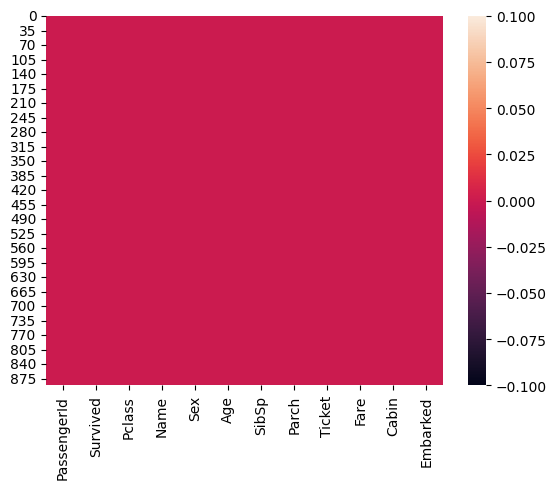

In [33]:
sns.heatmap(train.isna())

In [62]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [63]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [34]:
Survived_cont = train['Survived'].value_counts()
Survived_cont

,count
Survived,
0,549
1,342


In [36]:
 train['Sex'].value_counts()

,count
Sex,
1,577
0,314


<Axes: xlabel='Age', ylabel='Count'>

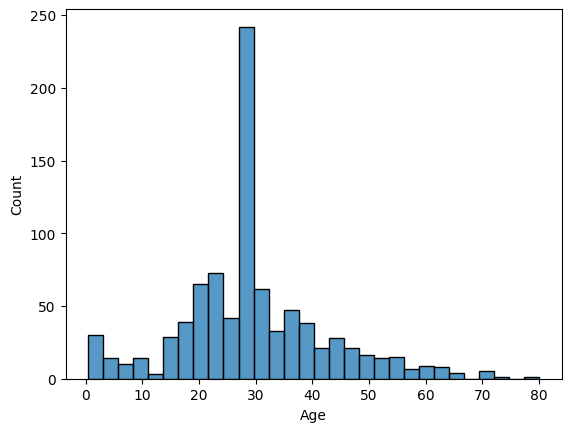

In [37]:
sns.histplot(train['Age'])

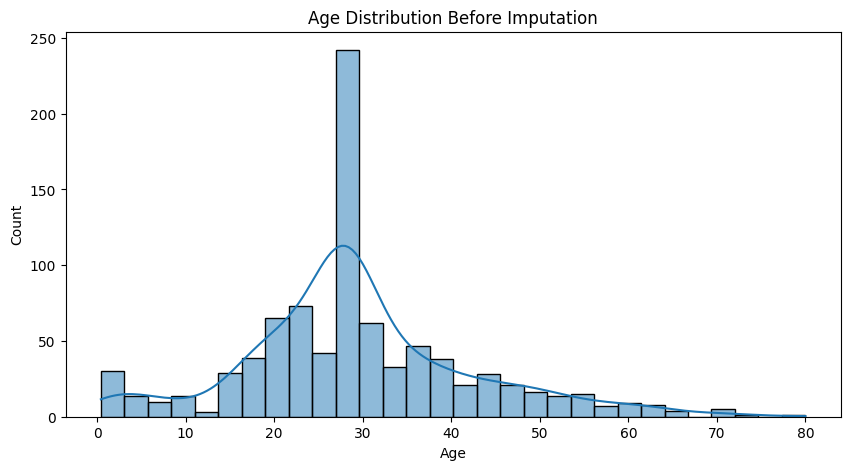

In [42]:
plt.figure(figsize=(10, 5))

sns.histplot(train['Age'], bins=30, kde=True)

plt.title('Age Distribution Before Imputation')

plt.show()

In [45]:
train['Age'].fillna(train['Age'].mode()[0])

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


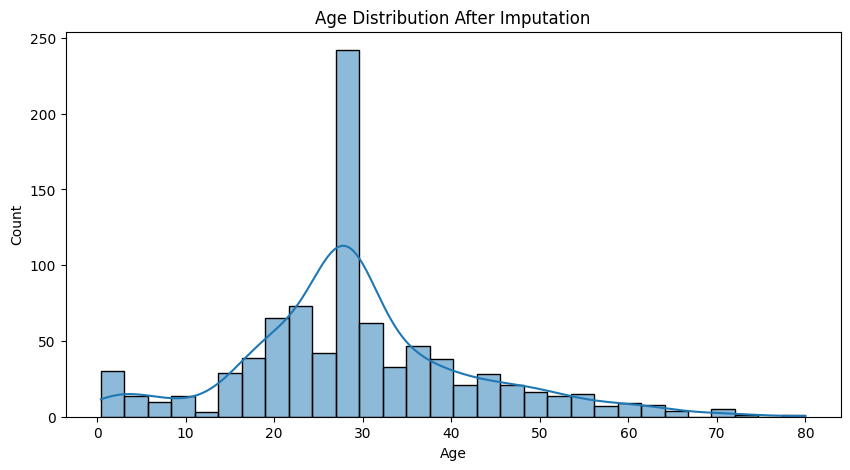

In [47]:
plt.figure(figsize=(10, 5))

sns.histplot(train['Age'], bins=30, kde=True)

plt.title('Age Distribution After Imputation')

plt.show()

In [49]:
train['Embarked'].fillna(train['Embarked'].mode()[0])

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


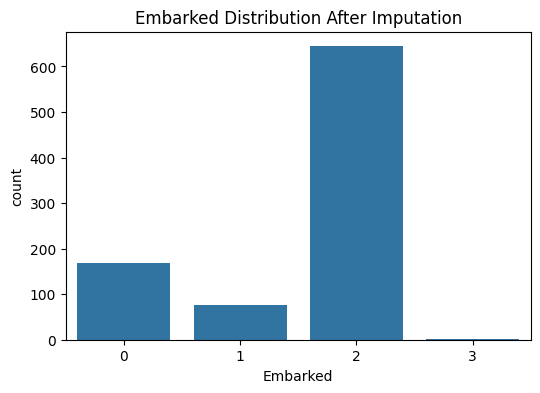

In [51]:
plt.figure(figsize=(6, 4))

sns.countplot(x='Embarked', data=train)

plt.title('Embarked Distribution After Imputation')

plt.show()

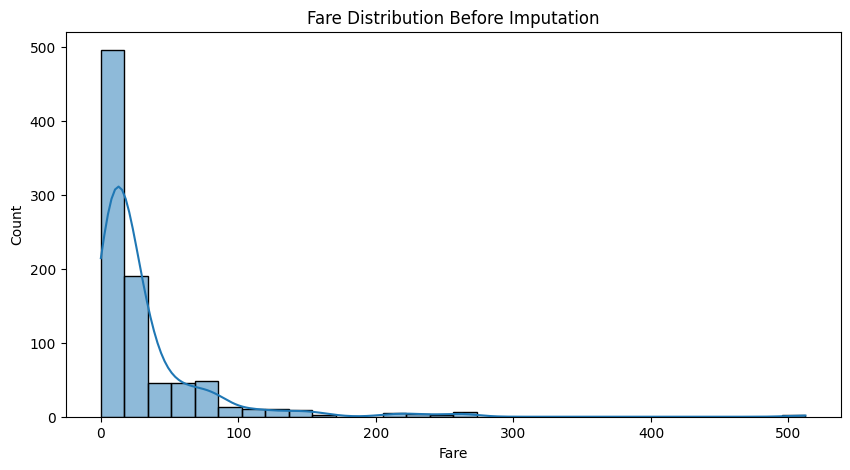

In [52]:
plt.figure(figsize=(10, 5))

sns.histplot(train['Fare'], bins=30, kde=True)

plt.title('Fare Distribution Before Imputation')

plt.show()

In [55]:
train['Fare'].fillna(train['Fare'].median())

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


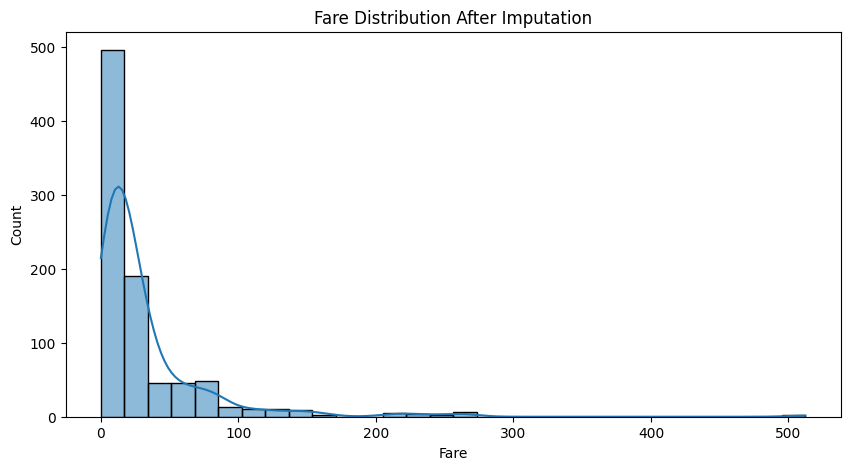

In [56]:
plt.figure(figsize=(10, 5))

sns.histplot(train['Fare'], bins=30, kde=True)

plt.title('Fare Distribution After Imputation')

plt.show()

In [57]:
train['Cabin'] = train['Cabin'].notnull().astype(int)

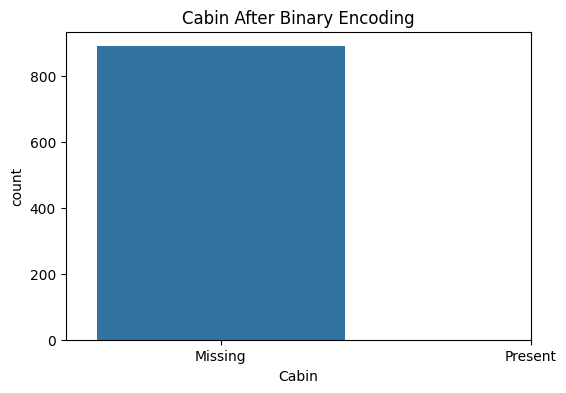

In [58]:
plt.figure(figsize=(6, 4))

sns.countplot(x=train['Cabin'])

plt.title('Cabin After Binary Encoding')

plt.xticks([0, 1], ['Missing', 'Present'])

plt.show()

In [60]:
for col in ['Pclass', 'SibSp', 'Parch', 'Ticket', 'Survived', 'Sex']:

    train[col].fillna(train[col].mode()[0])

In [17]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

train['Age']=imputer.fit_transform(train[['Age']])

test['Age']=imputer.fit_transform(test[['Age']])

In [38]:
lable = LabelEncoder()
train['Sex']=lable.fit_transform(train['Sex'])
test['Sex']=lable.fit_transform(test['Sex'])

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,76,2


In [16]:
train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


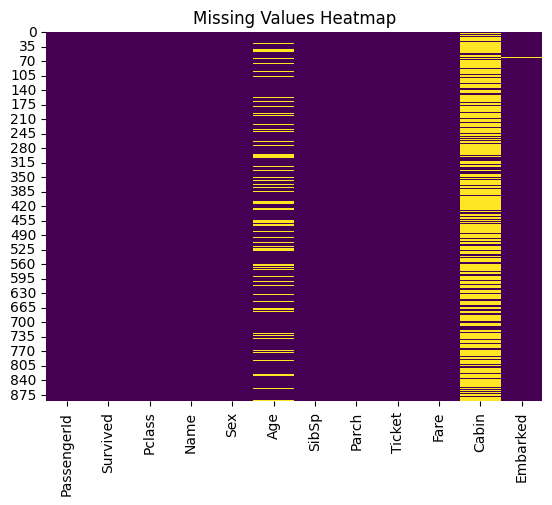

In [ ]:
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

<ipython-input-8-ffc938576c79>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train, palette="pastel")


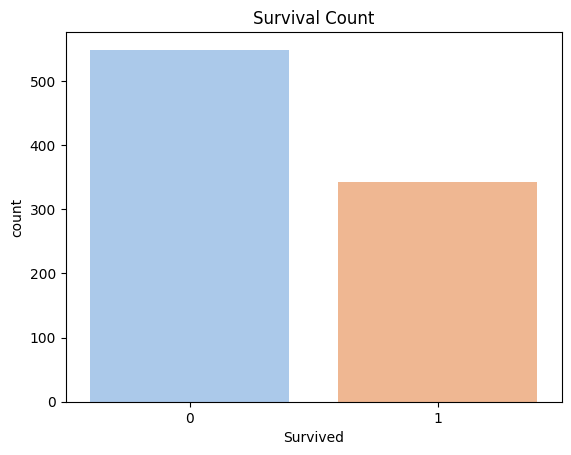

In [ ]:
sns.countplot(x="Survived", data=train, palette="pastel")
plt.title("Survival Count")
plt.show()

<ipython-input-18-e2620c97e790>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Survived', shade=True)
<ipython-input-18-e2620c97e790>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Not Survived', shade=True)


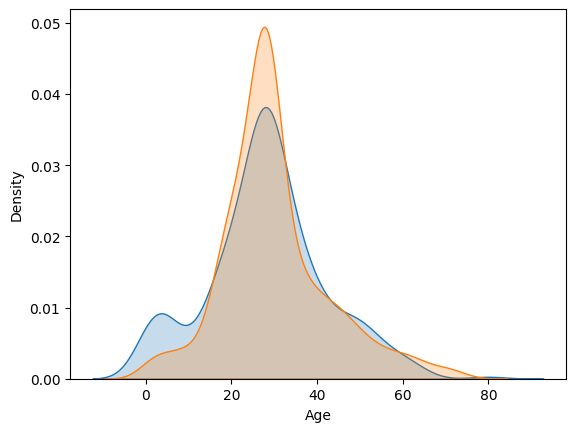

In [18]:
sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Survived', shade=True)

sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Not Survived', shade=True)

plt.xlabel('Age')

plt.ylabel('Density')

plt.show()

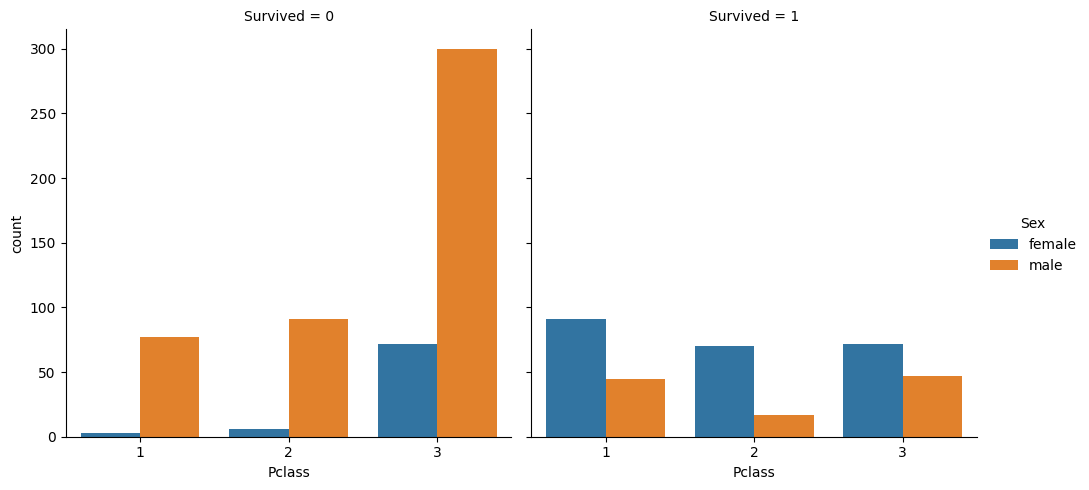

In [19]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count")
plt.show()

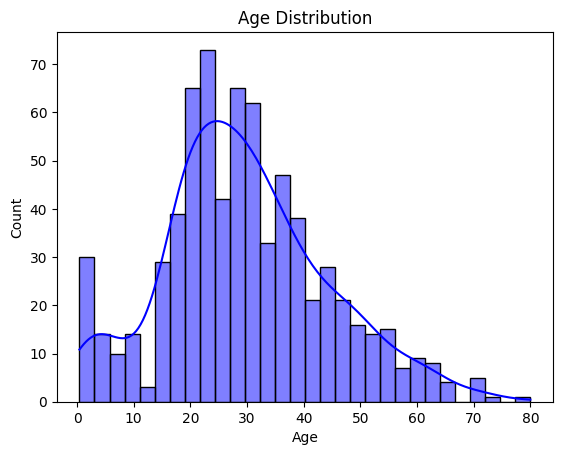

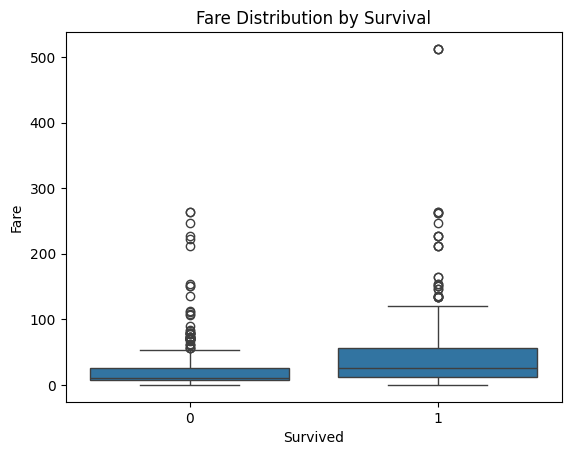

In [ ]:
sns.histplot(train["Age"].dropna(), kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.show()

sns.boxplot(x="Survived", y="Fare", data=train)
plt.title("Fare Distribution by Survival")
plt.show()

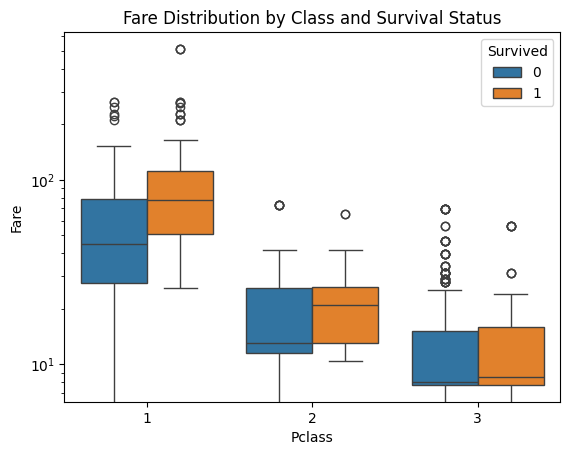

In [20]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train)

plt.title("Fare Distribution by Class and Survival Status")

plt.yscale('log')

plt.show()

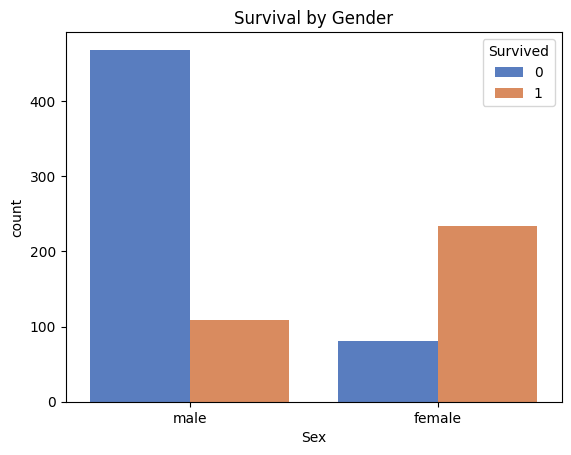

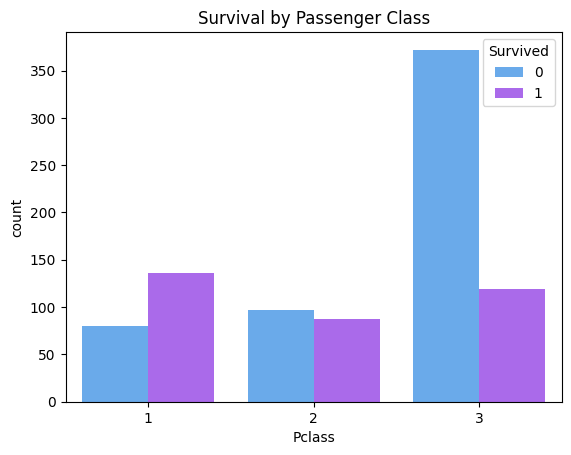

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=train, palette="muted")
plt.title("Survival by Gender")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=train, palette="cool")
plt.title("Survival by Passenger Class")
plt.show()

In [ ]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)

train["HasCabin"] = train["Cabin"].notnull().astype(int)
test["HasCabin"] = test["Cabin"].notnull().astype(int)


<ipython-input-12-7250b7d22716>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
<ipython-input-12-7250b7d22716>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64


In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"]
train["Title"] = train["Title"].replace(rare_titles, "Rare")
test["Title"] = test["Title"].replace(rare_titles, "Rare")


In [ ]:
train.head()
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize,Title
0,3,male,34.5,0,0,7.8292,Q,0,1,Mr
1,3,female,47.0,1,0,7.0000,S,0,2,Mrs
2,2,male,62.0,0,0,9.6875,Q,0,1,Mr
3,3,male,27.0,0,0,8.6625,S,0,1,Mr
4,3,female,22.0,1,1,12.2875,S,0,3,Mrs


In [ ]:
train = train.drop(["PassengerId", "Ticket", "Cabin", "Name"], axis=1)
test = test.drop(["PassengerId", "Ticket", "Cabin", "Name"], axis=1)

In [74]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

train['Sex'] = label.fit_transform(train['Sex'])

train['Embarked'] = label.fit_transform(train['Embarked'])

train['Cabin'] = label.fit_transform(train['Cabin'])

test['Sex'] = label.fit_transform(test['Sex'])

test['Embarked'] = label.fit_transform(test['Embarked'])

test['Cabin'] = label.fit_transform(test['Cabin'])

train['Ticket'] = label.fit_transform(train['Ticket'])

test['Ticket'] = label.fit_transform(test['Ticket'])

In [23]:
from sklearn.preprocessing import LabelEncoder

for col in train.select_dtypes(include=['object']).columns:
    train[col] = LabelEncoder().fit_transform(train[col])


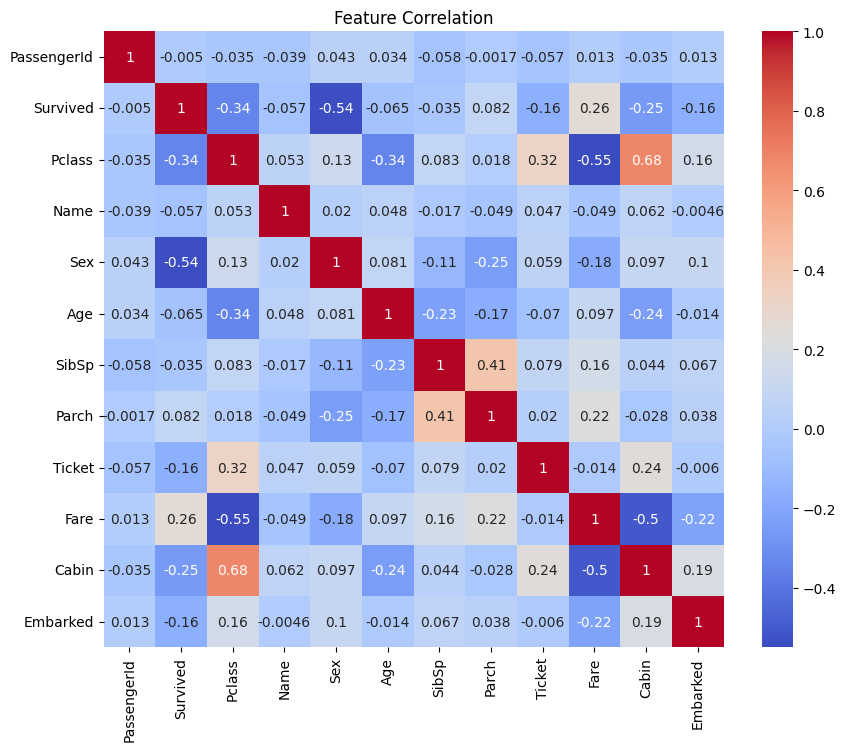

In [24]:
plt.figure(figsize=(10, 8))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [25]:
train.corr()['Survived'].sort_values()

,Survived
Sex,-0.543351
Pclass,-0.338481
Cabin,-0.254888
Ticket,-0.164549
Embarked,-0.163517
Age,-0.064910
Name,-0.057343
SibSp,-0.035322
PassengerId,-0.005007
Parch,0.081629


In [ ]:
num_features = ["Age", "Fare", "FamilySize"]
cat_features = ["Pclass", "Sex", "Embarked", "Title"]

num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)


In [70]:
train.drop('Name', axis=1, inplace=True)

In [71]:
test.drop('Name', axis=1, inplace=True)

In [72]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
y_test = test["PassengerId"]
X_train.shape, Y_train.shape, X_test.shape, y_test.shape

((891, 10), (891,), (418, 9), (418,))

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- PassengerId


In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_valid_preprocessed = preprocessor.transform(X_valid)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize,Title
331,1,1,45.5,0,0,28.5000,2,1,1,4
733,2,1,23.0,0,0,13.0000,2,0,1,4
382,3,1,32.0,0,0,7.9250,2,0,1,4
704,3,1,26.0,1,0,7.8542,2,0,2,4
813,3,0,6.0,4,2,31.2750,2,0,7,1


In [ ]:
X_valid.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize,Title
709,3,1,28.0,1,1,15.2458,0,0,3,0
439,2,1,31.0,0,0,10.5000,2,0,1,4
840,3,1,20.0,0,0,7.9250,2,0,1,4
720,2,0,6.0,0,1,33.0000,2,0,2,1
39,3,0,14.0,1,0,11.2417,0,0,2,1


In [ ]:
y_train.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [ ]:
y_valid.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_preprocessed, y_train)

RandomForestClassifier()

In [ ]:
prediction = rfc.predict(X_valid_preprocessed)
prediction

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_valid, prediction))
print("Confusion Matrix:\n", confusion_matrix(y_valid, prediction))
print("Classification Report:\n", classification_report(y_valid, prediction))

Accuracy: 0.8324022346368715
Confusion Matrix:
 [[88 17]
 [13 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       105
           1       0.78      0.82      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



<Axes: >

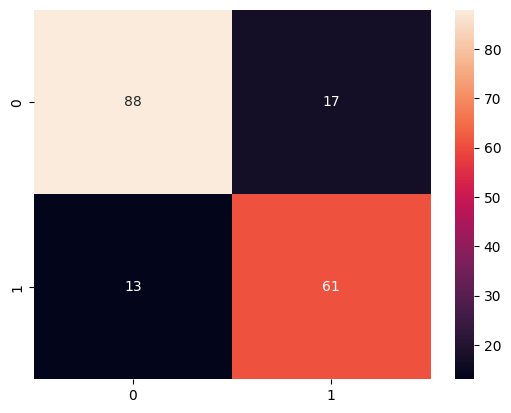

In [ ]:
sns.heatmap(confusion_matrix(y_valid, prediction), annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dt.predict(X_valid_preprocessed)
prediction

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_valid, prediction))
print("Confusion Matrix:\n", confusion_matrix(y_valid, prediction))
print("Classification Report:\n", classification_report(y_valid, prediction))

Accuracy: 0.7541899441340782
Confusion Matrix:
 [[83 22]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       105
           1       0.70      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



<Axes: >

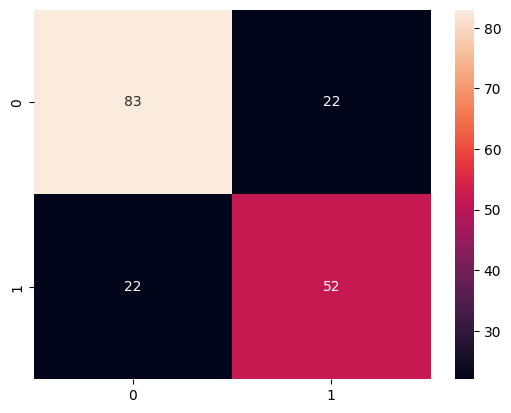

In [ ]:
sns.heatmap(confusion_matrix(y_valid, prediction), annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_preprocessed, y_train)

LogisticRegression()

In [ ]:
prediction = lr.predict(X_valid_preprocessed)
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
lr.coef_

array([[-0.25638344,  0.2628927 , -0.7026312 ,  0.72200672,  0.16929186,
        -0.8881046 ,  0.88639117, -0.88319719,  0.25039683,  0.02052919,
        -0.26773204,  1.56113942, -0.37393328,  0.06713667,  0.03349795,
        -1.34810261,  0.72733601,  0.11585321, -0.77973336]])

In [ ]:
lr.intercept_

array([0.75366341])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_preprocessed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [ ]:
prediction = abc.predict(X_valid_preprocessed)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_valid, prediction))
print("Confusion Matrix:\n", confusion_matrix(y_valid, prediction))
print("Classification Report:\n", classification_report(y_valid, prediction))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<Axes: >

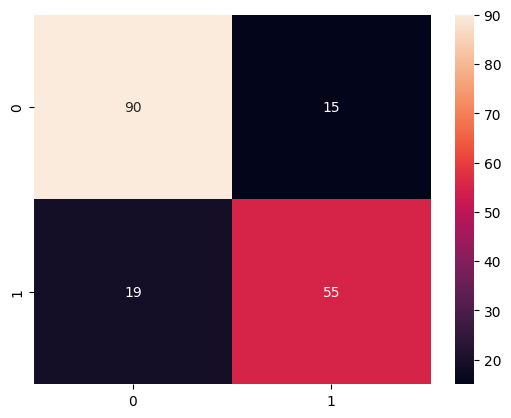

In [ ]:
sns.heatmap(confusion_matrix(y_valid, prediction), annot=True)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(X_train_preprocessed, y_train)

BaggingClassifier()

In [ ]:
prediction = bc.predict(X_valid_preprocessed)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_valid, prediction))
print("Confusion Matrix:\n", confusion_matrix(y_valid, prediction))
print("Classification Report:\n", classification_report(y_valid, prediction))

Accuracy: 0.8268156424581006
Confusion Matrix:
 [[90 15]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<Axes: >

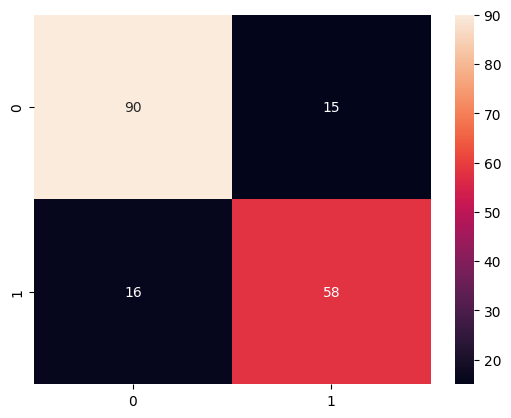

In [ ]:
sns.heatmap(confusion_matrix(y_valid, prediction), annot=True)

**Train New Model**

In [61]:
# Train a new model with class weights
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

model.fit(X_train, y_train)



# Predictions and evaluation

y_pred = model.predict(X_valid)

print("Accuracy:", accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

NameError: name 'y_train' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score



# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.show()



# ROC Curve

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)



plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], 'r--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc='lower right')

plt.show()


In [ ]:
import pandas as pd

# Step 1: Collect model performance metrics
model_performance = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost"],
    "Accuracy": [0.85, 0.89, 0.87, 0.91],
    "Precision": [0.82, 0.88, 0.86, 0.90],
    "Recall": [0.84, 0.87, 0.85, 0.92],
    "F1-Score": [0.83, 0.88, 0.85, 0.91]
}

# Step 2: Create a DataFrame
performance_df = pd.DataFrame(model_performance)

# Step 3: Display the DataFrame as a table
print(performance_df)

# Optionally save the table to a file
performance_df.to_csv("model_performance.csv", index=False)

# Step 4: Visualize (Optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Model Performance Comparison")
plt.show()
